# 1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.


In [1]:
#Carga de librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Se realiza la lectura de los datos del dataset
Datos = pd.read_csv('./Titanic-Dataset.csv')

In [3]:
#Se realiza la lectura de los datos del dataset
Datos.head(891)

,PasajeroId,Sobrevivio,Pclass,Nombre,Sexo,Edad,SibSp,Parch,Ticket,Fare,Cabina,Embarcacion
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
Datos.describe()

,PasajeroId,Sobrevivio,Pclass,Edad,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Edad'>

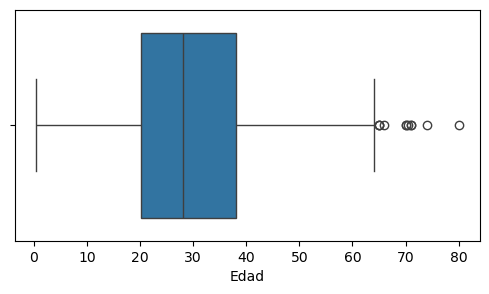

In [5]:
#Identificacion de datos faltantes y atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Edad'])

<Axes: xlabel='SibSp'>

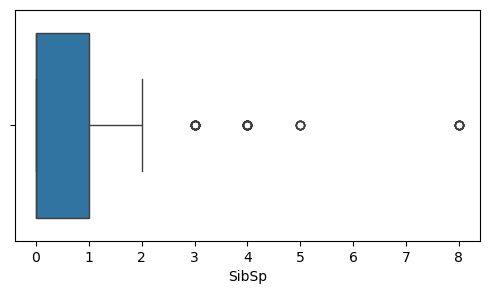

In [6]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['SibSp'])

<Axes: xlabel='Parch'>

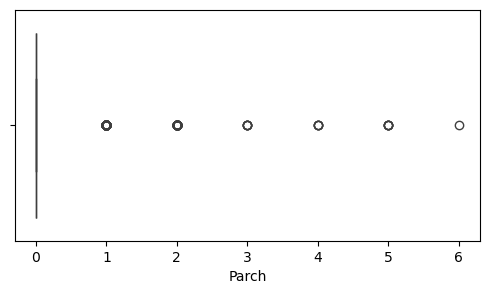

In [7]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Parch'])

<Axes: xlabel='Fare'>

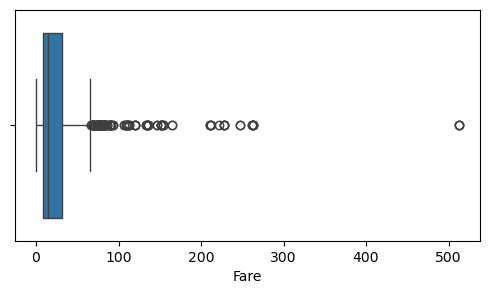

In [8]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Fare'])

<Axes: xlabel='Sobrevivio'>

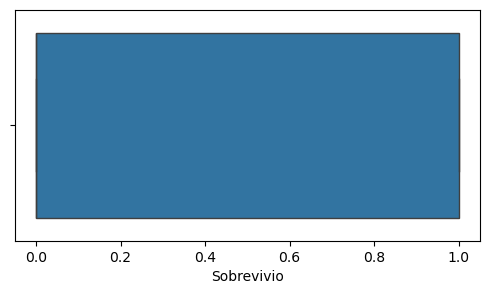

In [9]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Sobrevivio'])

In [10]:
print("Cantidad de Registros con cero en Edad: ", Datos['Edad'].isin([0]).sum())
print("Cantidad de Registros con cero en Fare: ", Datos['Fare'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Fare:  15


In [11]:
Datos['Fare'] = Datos['Fare'].replace(0, Datos['Fare'].mean())

In [12]:
print("Cantidad de Registros con cero en Edad: ", Datos['Edad'].isin([0]).sum())
print("Cantidad de Registros con cero en SibSp: ", Datos['SibSp'].isin([0]).sum())
print("Cantidad de Registros con cero en Parch: ", Datos['Parch'].isin([0]).sum())
print("Cantidad de Registros con cero en Fare: ", Datos['Fare'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en SibSp:  608
Cantidad de Registros con cero en Parch:  678
Cantidad de Registros con cero en Fare:  0


Text(0.5, 1.0, 'Identificacion de Datos Atipicos')

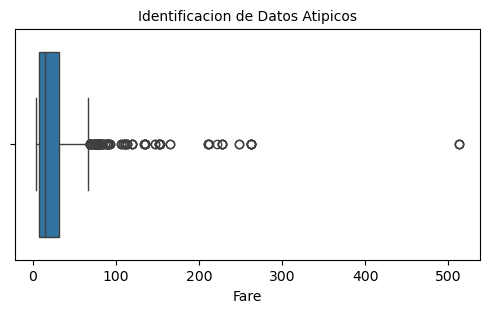

In [13]:
#Identificación de datos atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Fare'])
plt.title('Identificacion de Datos Atipicos', fontsize=10)

In [14]:
#Conteo de datos atipicos
nivel_minimo=15
nivel_maximo=500
total_atipicos=((Datos['Fare']<nivel_minimo)|(Datos['Fare']>nivel_maximo)).sum()

In [15]:
Datos=Datos[(Datos['Fare']<nivel_maximo)&(Datos['Fare']>nivel_minimo)]

In [16]:
#Revision del tipo de datos y datos faltantes
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PasajeroId   445 non-null    int64  
 1   Sobrevivio   445 non-null    int64  
 2   Pclass       445 non-null    int64  
 3   Nombre       445 non-null    object 
 4   Sexo         445 non-null    object 
 5   Edad         368 non-null    float64
 6   SibSp        445 non-null    int64  
 7   Parch        445 non-null    int64  
 8   Ticket       445 non-null    object 
 9   Fare         445 non-null    float64
 10  Cabina       181 non-null    object 
 11  Embarcacion  443 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 45.2+ KB


In [17]:
#Se asigna la media para los valores faltante de edad y palabara Desconocido para Cabina
Datos['Edad']=Datos['Edad'].fillna(Datos['Edad'].median())
Datos['Cabina']=Datos['Cabina'].fillna('Desconocido')
Datos['Sexo'] = np.where(Datos['Sexo'] == 'male', 0, 1)

In [18]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PasajeroId   445 non-null    int64  
 1   Sobrevivio   445 non-null    int64  
 2   Pclass       445 non-null    int64  
 3   Nombre       445 non-null    object 
 4   Sexo         445 non-null    int32  
 5   Edad         445 non-null    float64
 6   SibSp        445 non-null    int64  
 7   Parch        445 non-null    int64  
 8   Ticket       445 non-null    object 
 9   Fare         445 non-null    float64
 10  Cabina       445 non-null    object 
 11  Embarcacion  443 non-null    object 
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 43.5+ KB


In [19]:
Datos['Edad'].value_counts()

Edad
31.0    87
24.0    17
36.0    14
35.0    10
30.0    10
        ..
20.0     1
80.0     1
15.0     1
28.5     1
70.0     1
Name: count, Length: 72, dtype: int64

In [20]:
Datos['Sobrevivio'].value_counts()


Sobrevivio
1    226
0    219
Name: count, dtype: int64

In [21]:
Datos['Edad'].head(704)

1      38.0
3      35.0
6      54.0
7       2.0
9      14.0
       ... 
880    25.0
885    39.0
887    19.0
888    31.0
889    26.0
Name: Edad, Length: 445, dtype: float64

In [22]:
Datos['Sobrevivio'].head(704)

1      1
3      1
6      0
7      0
9      1
      ..
880    1
885    0
887    1
888    0
889    1
Name: Sobrevivio, Length: 445, dtype: int64

In [23]:
X = Datos.drop(['Sobrevivio', 'Nombre', 'Cabina', 'Embarcacion', 'Ticket'], axis=1)
Y = Datos['Sobrevivio']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

In [24]:
print (X_train)

     PasajeroId  Pclass  Sexo  Edad  SibSp  Parch        Fare
712         713       1     0  48.0      1      0   52.000000
195         196       1     1  58.0      0      0  146.520800
811         812       3     0  39.0      0      0   24.150000
49           50       3     1  18.0      1      0   17.800000
467         468       1     0  56.0      0      0   26.550000
..          ...     ...   ...   ...    ...    ...         ...
262         263       1     0  52.0      1      1   79.650000
140         141       3     1  31.0      0      2   15.245800
25           26       3     1  38.0      1      5   31.387500
542         543       3     1  11.0      4      2   31.275000
633         634       1     0  31.0      0      0   32.204208

[333 rows x 7 columns]


In [25]:
print (Y_test)

787    0
324    0
583    0
596    1
515    0
      ..
496    1
237    1
110    0
642    0
644    1
Name: Sobrevivio, Length: 112, dtype: int64


In [26]:
modelo_regresion = LogisticRegression(solver='liblinear')
modelo_regresion.fit(X_train, Y_train)

Prediccion = modelo_regresion.predict(X_test)

In [27]:
print(Y_test)

787    0
324    0
583    0
596    1
515    0
      ..
496    1
237    1
110    0
642    0
644    1
Name: Sobrevivio, Length: 112, dtype: int64


In [28]:
print(Prediccion)

[0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0
 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1
 1]


In [29]:
print(classification_report(Y_test, Prediccion))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79        55
           1       0.85      0.68      0.76        57

    accuracy                           0.78       112
   macro avg       0.79      0.78      0.78       112
weighted avg       0.79      0.78      0.78       112



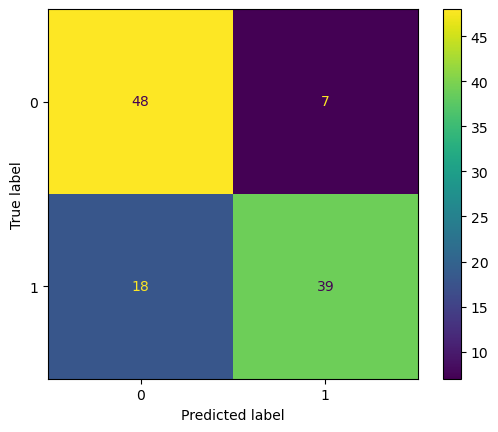

In [30]:
cm=confusion_matrix(Y_test, Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

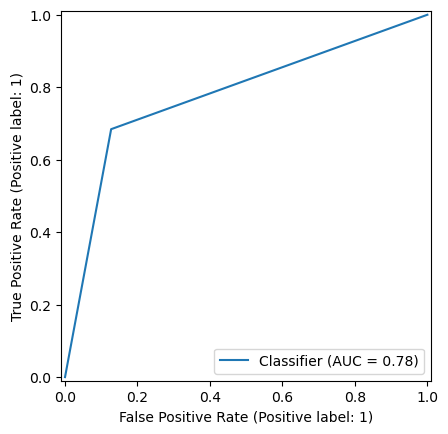

In [31]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

1. El modelo tiene un mejor desempeño prediciendo la clase 0 (no sobrevivió), con un recall del 87%.
2. La clase 1 (sobrevivió) tiene un recall más bajo (68%), lo que indica que el modelo tiende a perder ejemplos de esta clase.
3. La precisión para la clase 1 es alta (85%), lo que significa que, aunque detecta menos casos, lo hace con alta confianza.
4. La precisión general (accuracy) del 78% es aceptable, pero puede ser mejorada, especialmente para equilibrar el desempeño entre ambas clases.
5. La curva ROC muestra que, a medida que aumenta la Tasa de Falsos Positivos (FPR), también lo hace la Tasa de Verdaderos Positivos (TPR). Esto es esperado porque el modelo está ajustando el umbral para clasificar las instancias.